# wt_ts_filler

## Purpose
This python package aims to clean up time series of groundwater levels and fill in missing data using correlated time series from nearby wells. This notebook presents an application example based on groundwater level data measured in the Var alluvial aquifer (France).


## Libraries

In [1]:
from tsfiller.Filling_gaps import GapsFiller
from tsfiller.cleaning import SpikeCleaner, FlatPeriodCleaner
from tsfiller.plotting import *

import pandas as pd

## Input data

In [2]:
# Import dataframe
dataframe = pd.read_csv('data/wt_ts_Var.csv')
# Set dates in datetime format
dataframe.iloc[:,0] = pd.to_datetime(dataframe.iloc[:,0], format='%Y-%m-%d') 

print(dataframe)

        Date de la mesure  09724X0023/P2  09724X0028/P37  09728X0177/PZ1BEC
0     2012-01-01 00:00:00         103.54          109.45                NaN
1     2012-01-02 00:00:00         103.54          109.43                NaN
2     2012-01-03 00:00:00         103.53          109.42                NaN
3     2012-01-04 00:00:00         103.52          109.40                NaN
4     2012-01-05 00:00:00         103.50          109.37                NaN
...                   ...            ...             ...                ...
4629  2024-09-03 00:00:00          99.79          103.77              95.97
4630  2024-09-04 00:00:00          99.66          103.58              96.04
4631  2024-09-05 00:00:00          99.79          103.45              96.05
4632  2024-09-06 00:00:00          99.85          103.50             122.77
4633  2024-09-07 00:00:00          99.85          103.52             122.71

[4634 rows x 4 columns]


## Cleaning 

Checking for jumps in data1
Checking for flat periods in data1


c:\Users\picourlat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\indexes\base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)
c:\Users\picourlat\Documents\040724_Data_recap\DATA\Hydrologic_data\Groundwater_lvls\Analyse_data_drought\wt_ts_filler\tsfiller\cleaning.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  while data[i+count+1] == data[i+count] :


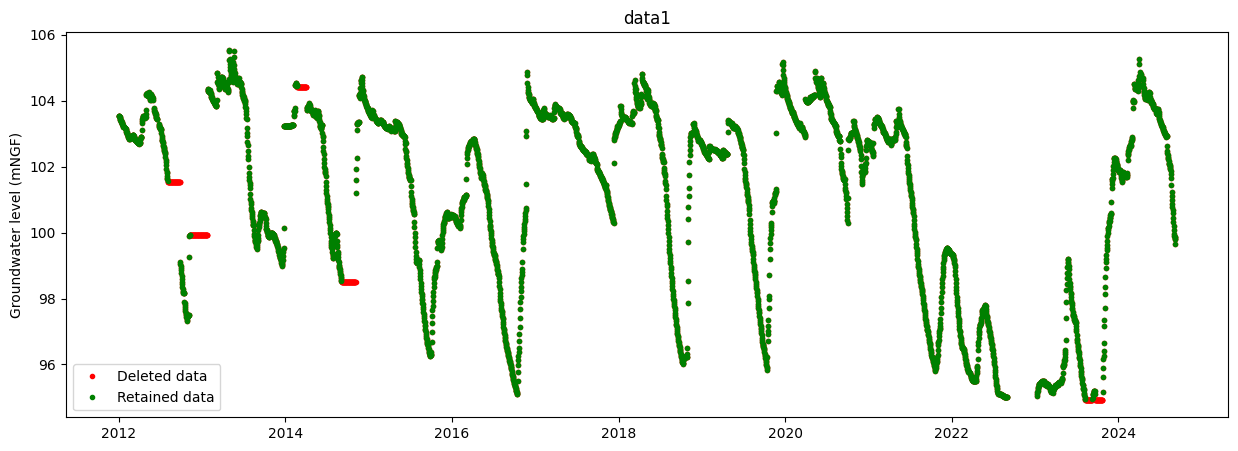

Checking for jumps in data2
Checking for flat periods in data2


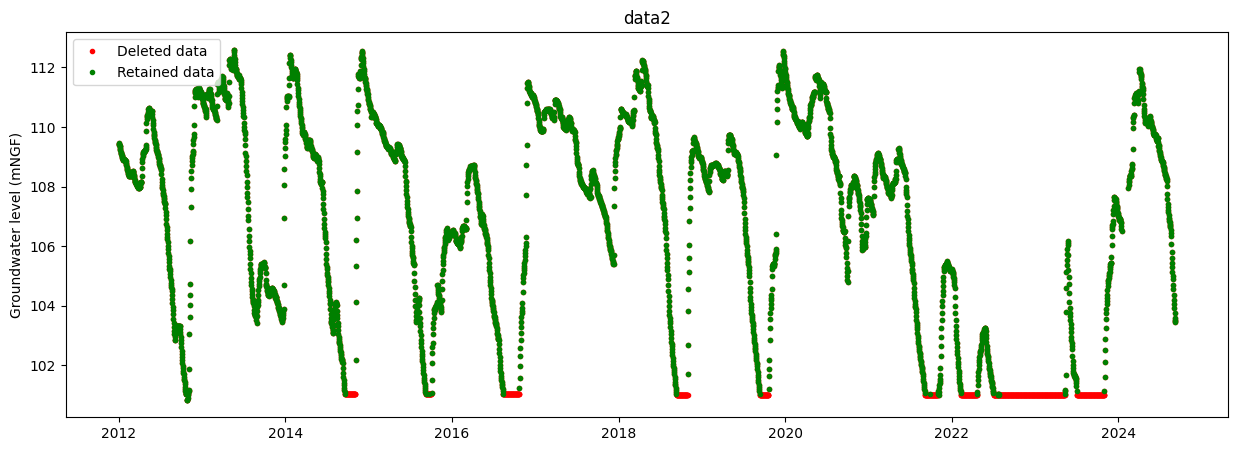

Checking for jumps in data3
Checking for flat periods in data3


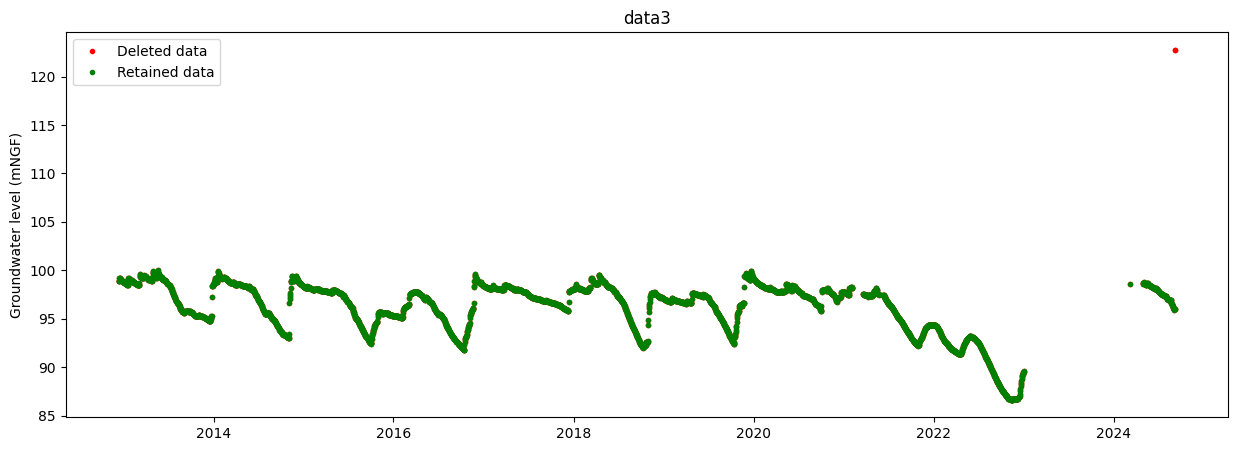

In [3]:
# Split the dataframe into data series
data_series = []
for i in range(1, len(dataframe.columns)):
    data = pd.Series(dataframe.iloc[:,i].values, index=dataframe.iloc[:,0], name="data"+str(i))
    data_series.append(data)

# Clean
cleaners = [
    SpikeCleaner(max_jump=10),
    FlatPeriodCleaner(flat_period=10)
]

for data in data_series :
    data_original = data.copy()
    for cleaner in cleaners:
        data = cleaner.clean(data)
    plot_timeseries(data_original, data)

# Dataframe reconstruction by concatenating data series
cleaned_dataframe = pd.concat(data_series, axis=1)

##  Filling gaps

Linear interpolation for gaps inf or equal to 5 days.
Estimation of missing data from a data set with a correlation coefficient greater than or equal to 0.75.


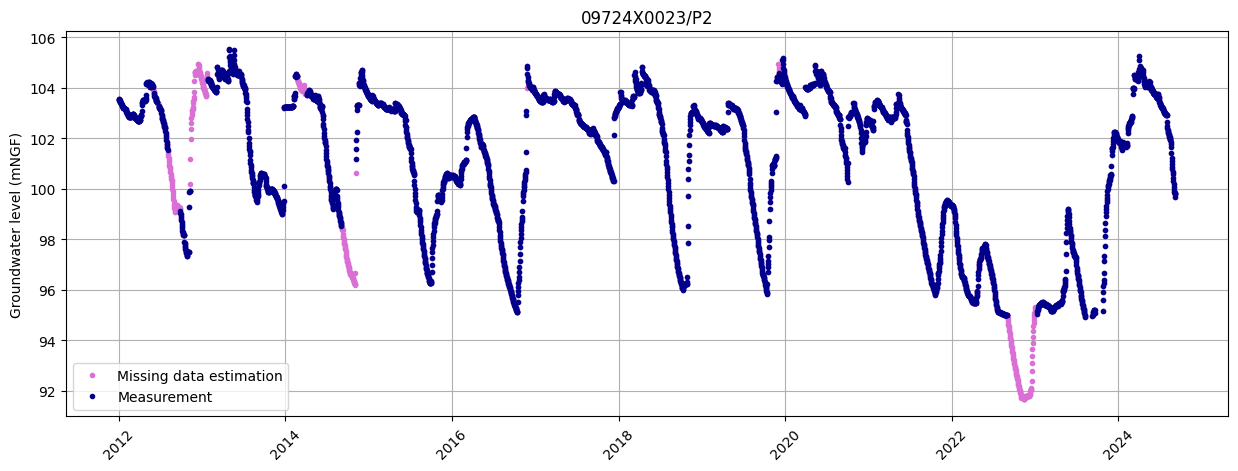

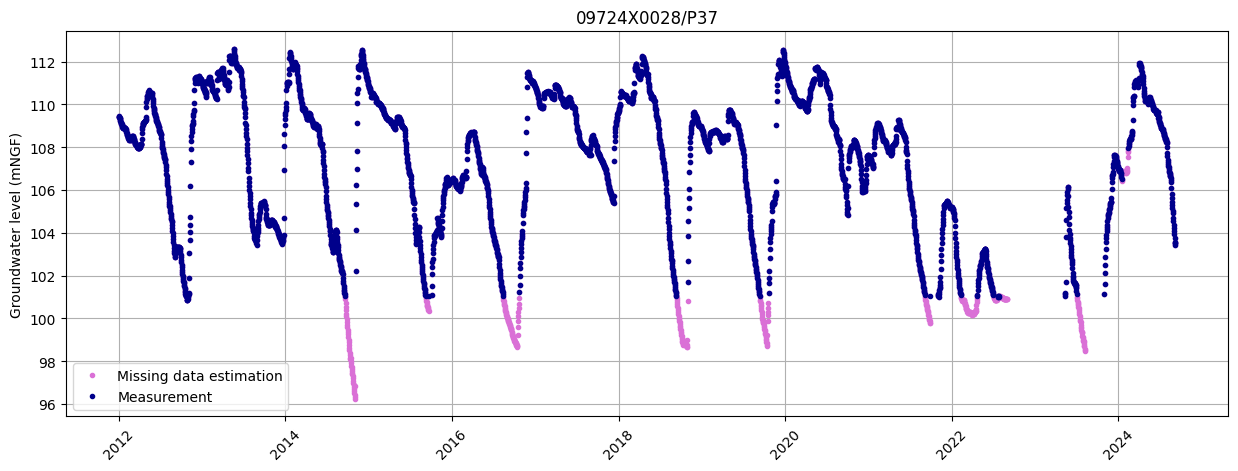

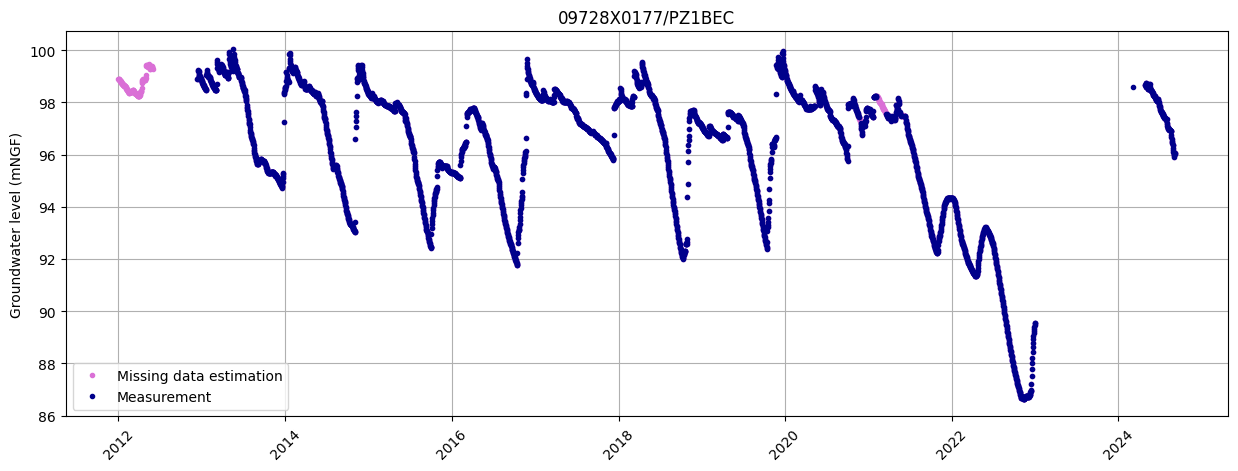

In [4]:
estimated_dataframe = GapsFiller(max_gap_lin_interp=5,Corr_min=0.75).fill(cleaned_dataframe)
estimated_dataframe.columns = dataframe.columns[1:]

plot_dataframes(cleaned_dataframe,estimated_dataframe)